<a href="https://colab.research.google.com/github/KendallScott/Machine-Learning/blob/main/SVM%20and%20LR/forestCoverLogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pd.set_option('display.max_columns',None)

# Reading and cleaning the data

In [ ]:
forest_cover_type = pd.read_csv('/Users/taddbackus/School/spring23/ML1/Lab1/covtype.csv')
forest_cover_type.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


#### Renaming wilderness areas

In [ ]:
forest_cover_type.rename(columns={'Wilderness_Area1':'Rawah','Wilderness_Area2':'Neota','Wilderness_Area3':'Comanche Peak','Wilderness_Area4':'Cache la Poudre'},inplace=True)
forest_cover_type.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Rawah,Neota,Comanche Peak,Cache la Poudre,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


#### The code below is used to turn categorical variables into individual columns (how the data was when we downloaded it) I kept it here for now for reference or if we change datasets

In [ ]:
#tmpSoil = pd.get_dummies(forest_cover_type.Soil_Type,prefix='Soil')
#forest_cover_type = pd.concat((forest_cover_type,tmpSoil),axis=1)
#tmpWild = pd.get_dummies(forest_cover_type.Wilderness_Area,prefix='Area')
#forest_cover_type = pd.concat((forest_cover_type,tmpWild),axis=1)

#### Creating a new dataset that only contains the most common cover types

In [ ]:
forestDF = forest_cover_type[(forest_cover_type['Cover_Type']==1) | (forest_cover_type['Cover_Type']==2)]

#### Renaming cover type to actual names

We could skip the next couple steps and just leave cover type as 1 and 2 and everything should work. Left it like this for workflow/reference.

In [ ]:
# this isnt necessary but maybe helpful for plotting or seeing which cover types are use
forestDF = forestDF.astype({'Cover_Type':'string'})
forestDF['Cover_Type'] = forestDF['Cover_Type'].str.replace('1','Spruce/Fir')
forestDF['Cover_Type'] = forestDF['Cover_Type'].str.replace('2','Lodgepole Pine')
forestDF['Cover_Type'].describe().transpose()

count             495141
unique                 2
top       Lodgepole Pine
freq              283301
Name: Cover_Type, dtype: object

#### Coding Lodgepole Pine as 1 and Spruce/Fir as 0

In [ ]:
# Lodgepole Pine = 1 | Spruce/Fir = 0
forestDF['treeType'] = forestDF.Cover_Type=='Lodgepole Pine'
forestDF.treeType = forestDF.treeType.astype(np.int64)

#### Deleting original cover type column

In [ ]:
if 'Cover_Type' in forestDF:
    del forestDF['Cover_Type']

# Logistic Regression

### Splitting the data between response and predictors

In [ ]:
if 'treeType' in forestDF:
    Y = forestDF['treeType'].values
    del forestDF['treeType']
    X = forestDF.values

### Creating cross validation object

In [ ]:
num_cv_iter = 3
num_instances = len(Y)
cv_object = ShuffleSplit(n_splits=num_cv_iter,test_size=0.2)
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


### Creating logistic regression object

In [ ]:
lr_clf = LogisticRegression(penalty='l2',C=1.0,class_weight=None)

### Running logistic regression on 3 random test/train splits

In [ ]:
iter_num = 0

for iter_num, (train_indices,test_indices) in enumerate(cv_object.split(X,Y)):
    lr_clf.fit(X[train_indices],Y[train_indices])
    y_hat = lr_clf.predict(X[test_indices])
    
    print('****Iteration',iter_num,'****')
    print('Accuracy',mt.accuracy_score(Y[test_indices],y_hat))
    print('Confusion Matrix \n',mt.confusion_matrix(Y[test_indices],y_hat))
    

/Users/taddbackus/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 0 ****
Accuracy 0.7590402811297701
Confusion Matrix 
 [[29500 12821]
 [11041 45667]]


/Users/taddbackus/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 1 ****
Accuracy 0.7545971382120389
Confusion Matrix 
 [[29535 13048]
 [11254 45192]]
****Iteration 2 ****
Accuracy 0.7359056438013107
Confusion Matrix 
 [[28311 14069]
 [12084 44565]]


/Users/taddbackus/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Looking at weights of model

In [ ]:
weights = lr_clf.coef_.T
varNames = forestDF.columns
for coef, name in zip(weights,varNames):
    print(name,'has weight of',coef[0])

Elevation has weight of -0.006507185233786984
Aspect has weight of 0.003328234731780354
Slope has weight of 0.0558124850801022
Horizontal_Distance_To_Hydrology has weight of 0.0016408146145031662
Vertical_Distance_To_Hydrology has weight of 0.002162397676459563
Horizontal_Distance_To_Roadways has weight of 1.6933753469251542e-05
Hillshade_9am has weight of 0.0552140422522296
Hillshade_Noon has weight of 0.015054574025640645
Hillshade_3pm has weight of 0.020011953296374334
Horizontal_Distance_To_Fire_Points has weight of 4.4117720731037485e-05
Rawah has weight of 1.3276347083867306e-05
Neota has weight of -0.00033672365439654946
Comanche Peak has weight of 0.0008864912274745806
Cache la Poudre has weight of 7.644433184118451e-05
Soil_Type1 has weight of 0.0
Soil_Type2 has weight of 1.7454578508578006e-05
Soil_Type3 has weight of 2.3590609241997146e-05
Soil_Type4 has weight of 6.019964116377072e-05
Soil_Type5 has weight of 0.0
Soil_Type6 has weight of 1.656146581127273e-05
Soil_Type7 has

### Scaling the weights for interpretability

In [ ]:
sclObj = StandardScaler()
sclObj.fit(X[train_indices])

X_trainScaled = sclObj.transform(X[train_indices])
x_testScaled = sclObj.transform(X[test_indices])

lrs_clf = LogisticRegression(penalty='l2',C=0.05)
lrs_clf.fit(X_trainScaled,Y[train_indices])

y_hatS = lrs_clf.predict(x_testScaled)

acc = mt.accuracy_score(Y[test_indices],y_hatS)
conf = mt.confusion_matrix(Y[test_indices],y_hatS)
print('accuracy:',acc)
print(conf)

zipVars = zip(lrs_clf.coef_.T,forestDF.columns)
zipVars = sorted(zipVars)

for coef, name in zipVars:
    print(name,'has weight of', coef[0])
    

accuracy: 0.7745407910814004
[[30297 12083]
 [10244 46405]]
Elevation has weight of -1.6794661356819143
Hillshade_3pm has weight of -0.423164266659915
Soil_Type22 has weight of -0.21133646718986057
Soil_Type39 has weight of -0.2054336369161458
Soil_Type23 has weight of -0.18234499279450506
Hillshade_9am has weight of -0.15756906726616018
Soil_Type21 has weight of -0.13483394317686506
Soil_Type38 has weight of -0.11363904953538093
Soil_Type35 has weight of -0.10587531316076672
Soil_Type20 has weight of -0.09947513304201004
Soil_Type9 has weight of -0.08220188338709038
Soil_Type40 has weight of -0.08163183925054227
Comanche Peak has weight of -0.0789443706961055
Horizontal_Distance_To_Fire_Points has weight of -0.0538224007469042
Rawah has weight of -0.0483614443827759
Soil_Type19 has weight of -0.044607997037665506
Soil_Type16 has weight of -0.0347943900417154
Soil_Type17 has weight of -0.025258397977756
Soil_Type27 has weight of -0.015366018586935069
Soil_Type24 has weight of -0.010039

### Plotting weights because probably useful (scaled weights)

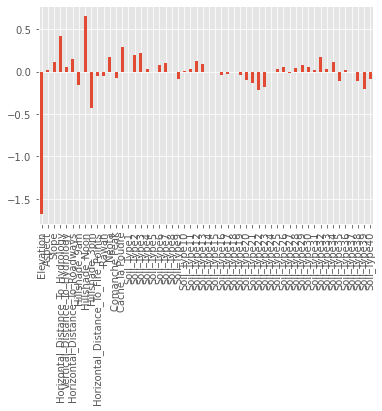

In [ ]:
%matplotlib inline
plt.style.use('ggplot')
weights = pd.Series(lrs_clf.coef_[0],index=forestDF.columns)
weights.plot(kind='bar')
plt.show()

### after this in the notebook i was following he goes over stuff to remove related variables to help with overfitting

# Support Vector Machine

### Creating and running the SVM using the scaled and split sets from earlier

### do not run, it isnt finishing for some reason and breaks the whole notebook

In [ ]:
#svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto')
#svm_clf.fit(X_trainScaled,Y[train_indices])


test


In [ ]:


#y_hatSVM = svm_clf.predict(X_testScaled)

#acc = mt.accuracy_score(Y[test_indices],y_hatSVM)
#conf = mt.confusion_matrix(Y[test_indices],y_hatSVM)
#print('accuracy:',acc)
#print(conf)
